In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

<AxesSubplot: >

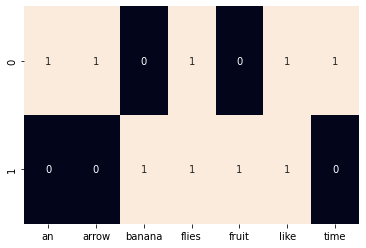

In [5]:
corpus = ['Time flies flies like an arrow.','Fruit flies like a banana.']
vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']
one_hot_vectorizor = CountVectorizer(binary=True)
one_hot = one_hot_vectorizor.fit_transform(corpus).toarray()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels=vocab)

<AxesSubplot: >

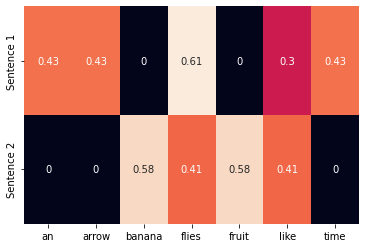

In [8]:
tfid_vec = TfidfVectorizer()
tfidf = tfid_vec.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab, yticklabels=['Sentence 1', 'Sentence 2'])

In [9]:
import torch 
torch.cuda.is_available()

False

In [18]:
a = torch.randn(2, 3)
a.unsqueeze(0)

tensor([[[-2.1319, -1.1868,  0.7009],
         [-1.6980,  0.6296,  1.0900]]])

In [19]:
a.squeeze(0)

tensor([[-2.1319, -1.1868,  0.7009],
        [-1.6980,  0.6296,  1.0900]])

In [22]:
a = torch.rand(3, 4, 5)
b = torch.rand(3, 5, 4)
torch.bmm(a, b)

tensor([[[2.4374, 0.9894, 0.9429, 1.4779],
         [1.2127, 0.7404, 0.5353, 0.4316],
         [1.6041, 0.7178, 1.2745, 1.1946],
         [0.6881, 0.1395, 0.6090, 0.6030]],

        [[0.5809, 0.4190, 0.7356, 0.8756],
         [0.5026, 1.2066, 1.2362, 0.7365],
         [0.9868, 1.0874, 1.2981, 1.0287],
         [0.7291, 1.2040, 1.3435, 0.9976]],

        [[0.8309, 0.3763, 0.2454, 0.5427],
         [1.6123, 0.9758, 0.7895, 1.3957],
         [1.3191, 0.9141, 0.7983, 1.3100],
         [2.0535, 0.9531, 0.7227, 1.4498]]])

In [26]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = "mary, don't slap the green witch"
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [31]:
from nltk.tokenize import TweetTokenizer
tweet = "Snow White and Seven Degrees #MakeAMovieCols@midnight:-)"
tokenizer = TweetTokenizer()
text = tokenizer.tokenize(tweet.lower())
print(text)

['snow', 'white', 'and', 'seven', 'degrees', '#makeamoviecols', '@midnight', ':-)']


In [33]:
def n_grams(text, n):
  return [text[i:i+n] for i in range(len(text)-n+1)]
n_grams(text, 3)

[['snow', 'white', 'and'],
 ['white', 'and', 'seven'],
 ['and', 'seven', 'degrees'],
 ['seven', 'degrees', '#makeamoviecols'],
 ['degrees', '#makeamoviecols', '@midnight'],
 ['#makeamoviecols', '@midnight', ':-)']]

# Lemmas

In [34]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp('He was running late')
for token in doc:
  print(token, token.lemma_)

He he
was be
running run
late late


# POS(part-of-speech) Tagging

In [35]:
doc = nlp('Mary slapped the green witch.')
for token in doc:
  print(token, token.pos_)

Mary PROPN
slapped VERB
the DET
green ADJ
witch NOUN
. PUNCT


# Chunking or ParaPhrasing

In [36]:
for chunk in doc.noun_chunks:
  print(chunk, chunk.label_)

Mary NP
the green witch NP


In [42]:
import torch.nn as nn
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
prob = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
oss = bce_loss(prob, targets)
oss.item()

0.9474964141845703

In [45]:
import sys
sys.path.append('../MLModels/')
from perceptron import Perceptron
import torch
import torch.optim as optim

input_dim = 2
lr = 0.001
perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

In [47]:
# Dataset for Yelp Review
from torch.utils.data import Dataset
class ReviewDataset(Dataset):
  def __init__(self, review_df, vectorizer) -> None:
    self.review_df = review_df
    self.vectorizer = vectorizer
    self.train_df = self.review_df[self.review_df.split == 'train']
    
